In [2]:
cd ../src

/Users/dani/Google Drive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/src


In [73]:
from d07_visualization.viz_training import plot_acc, plot_training_loss, plot_losses
from d04_mixmatch.wideresnet import WideResNet
from d02_data.load_data import get_dataloaders_ssl
from d02_data.load_data_idxs import get_dataloaders_with_index
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## 4,000 labels

In [88]:
# Model 1
model_name = 'adam_4k/adam_4k_normal_second_run/checkpoint_200000.pt'
saved_model_1 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 2
model_name = 'adam_4k/adam_4k_pseudo_0.95/checkpoint_200000.pt'
saved_model_2 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 3
model_name = 'adam_4k/adam_4k_pseudo_0.99/checkpoint_200000.pt'
saved_model_3 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 4
model_name = 'adam_4k/adam_4k_pseudo_balanced/checkpoint_200000.pt'
saved_model_4 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 

92.75
92.24
92.73
92.66


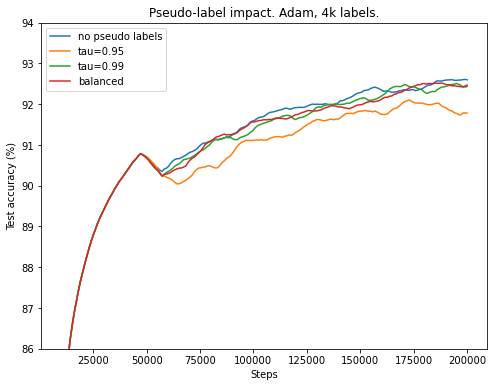

In [89]:
# loss_train = saved_model['loss_train']
# loss_val = saved_model['loss_val']
# acc_train = saved_model['acc_train']
acc_val_1 = saved_model_1['acc_val'][:-3]
acc_val_2 = saved_model_2['acc_val']
acc_val_3 = saved_model_3['acc_val']
acc_val_4 = saved_model_4['acc_val']

print(max(acc_val_1))
print(max(acc_val_2))
print(max(acc_val_3))
print(max(acc_val_4))

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
acc_val_1 = np.convolve(acc_val_1, kernel)[-200:-10]
acc_val_2 = np.convolve(acc_val_2, kernel)[-200:-10]
acc_val_3 = np.convolve(acc_val_3, kernel)[-200:-10]
acc_val_4 = np.convolve(acc_val_4, kernel)[-200:-10]

step = 1000
x = np.linspace(10*step, (10+len(acc_val_1))*step, len(acc_val_1))
plt.figure(figsize=(8,6))
plt.plot(x, acc_val_1, label='no pseudo labels')
plt.plot(x, acc_val_2, label='tau=0.95')
plt.plot(x, acc_val_3, label='tau=0.99')
plt.plot(x, acc_val_4, label='balanced')
plt.title('Pseudo-label impact. Adam, 4k labels.')
plt.xlabel('Steps')
plt.ylim(86,94)
plt.ylabel('Test accuracy (%)')
plt.legend()
plt.savefig('../results/figs/fig.png', format='png')
plt.show()



## 250 labels

In [93]:
# Model 1
model_name = 'adam_250/adam_250_no_pseudo/last_one_500k.pt'
saved_model_1 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 2
model_name = 'adam_250/adam_250_pseudo_0.95/checkpoint_150000.pt'
saved_model_2 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 3
model_name = 'adam_250/adam_250_pseudo_0.99/checkpoint_125000.pt'
saved_model_3 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 
# Model 4
model_name = 'adam_250/adam_250_pseudo_balanced/checkpoint_200000.pt'
saved_model_4 = torch.load(f'../models/{model_name}', map_location=torch.device('cpu')) 

In [94]:
acc_val_1 = saved_model_1['acc_val'][:200]

acc_val_2 = saved_model_2['acc_val']
extra = 200 - len(acc_val_2)
acc_val_2.extend(np.ones(extra)*10)

acc_val_3 = saved_model_3['acc_val']
extra = 200 - len(acc_val_3)
acc_val_3.extend(np.ones(extra)*10)

acc_val_4 = saved_model_4['acc_val']

print(max(acc_val_1))
print(max(acc_val_2))
print(max(acc_val_3))
print(max(acc_val_4))

86.38
84.54
84.09
86.6


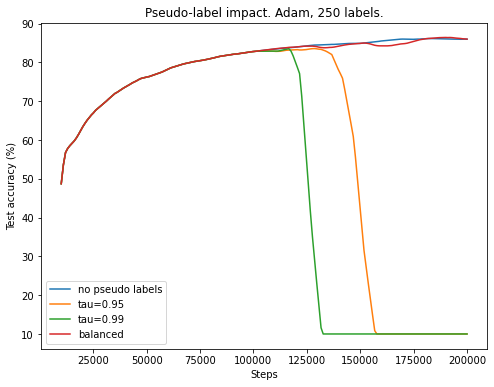

86.14300000000001
83.55300000000001
83.523
86.418


In [95]:
kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
acc_val_1 = np.convolve(acc_val_1, kernel)[-200:-10]
acc_val_2 = np.convolve(acc_val_2, kernel)[-200:-10]
acc_val_3 = np.convolve(acc_val_3, kernel)[-200:-10]
acc_val_4 = np.convolve(acc_val_4, kernel)[-200:-10]

step = 1000
x = np.linspace(10*step, (10+len(acc_val_1))*step, len(acc_val_1))
plt.figure(figsize=(8,6))
plt.plot(x, acc_val_1, label='no pseudo labels')
plt.plot(x, acc_val_2, label='tau=0.95')
plt.plot(x, acc_val_3, label='tau=0.99')
plt.plot(x, acc_val_4, label='balanced')
plt.title('Pseudo-label impact. Adam, 250 labels.')
plt.xlabel('Steps')
plt.ylabel('Test accuracy (%)')
plt.legend()
plt.savefig('../results/figs/fig.png', format='png')
plt.show()

print(max(acc_val_1))
print(max(acc_val_2))
print(max(acc_val_3))
print(max(acc_val_4))